In [32]:
import pandas as pd
import tensorflow as tf


In [33]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata (1).csv


In [34]:
import io
df = pd.read_csv(io.BytesIO(uploaded['housepricedata.csv']))

In [35]:
df = pd.read_csv('housepricedata.csv')

In [36]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [37]:
dataset = df.values

In [38]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [39]:
X = dataset[:,0:10]

In [40]:
Y = dataset[:,10]

In [41]:
from sklearn import preprocessing

In [42]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [43]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [46]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [47]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [48]:
from keras.models import Sequential
from keras.layers import Dense

In [49]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [50]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['mse'])

In [51]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.6881 - mse: 0.2475 - val_loss: 0.6842 - val_mse: 0.2455
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6826 - mse: 0.2447 - val_loss: 0.6794 - val_mse: 0.2431
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6783 - mse: 0.2426 - val_loss: 0.6748 - val_mse: 0.2408
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6740 - mse: 0.2405 - val_loss: 0.6702 - val_mse: 0.2385
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6723 - mse: 0.2396 - val_loss: 0.6661 - val_mse: 0.2365
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6663 - mse: 0.2366 - val_loss: 0.6623 - val_mse: 0.2346
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - mse: 0.2344 - val_loss: 0.6585 - val_mse: 0.2327
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6604 - m

In [52]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2476 - mse: 0.0732


0.07317137718200684

In [53]:
import matplotlib.pyplot as plt

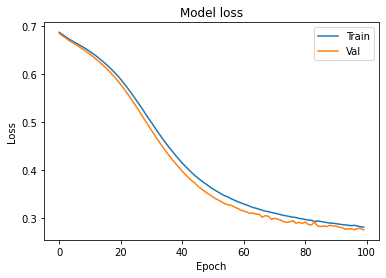

In [54]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

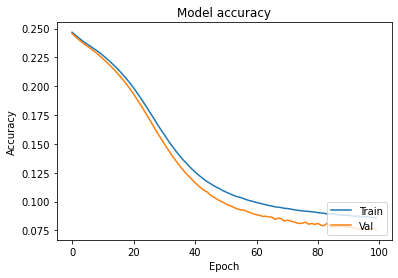

In [72]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [62]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [63]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['mse'])

In [64]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 43ms/step - loss: 0.5590 - mse: 0.1883 - val_loss: 0.3818 - val_mse: 0.1108
Epoch 2/100
32/32 [==============================] - 1s 42ms/step - loss: 0.3684 - mse: 0.1103 - val_loss: 0.3442 - val_mse: 0.0991
Epoch 3/100
32/32 [==============================] - 1s 43ms/step - loss: 0.3090 - mse: 0.0914 - val_loss: 0.2897 - val_mse: 0.0799
Epoch 4/100
32/32 [==============================] - 1s 40ms/step - loss: 0.3099 - mse: 0.0938 - val_loss: 0.3238 - val_mse: 0.0841
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.2768 - mse: 0.0840 - val_loss: 0.2982 - val_mse: 0.0743
Epoch 6/100
32/32 [==============================] - 1s 43ms/step - loss: 0.2551 - mse: 0.0790 - val_loss: 0.3192 - val_mse: 0.0811
Epoch 7/100
32/32 [==============================] - 1s 43ms/step - loss: 0.2934 - mse: 0.0868 - val_loss: 0.3037 - val_mse: 0.0719
Epoch 8/100
32/32 [==============================] - 1s 45ms/step - loss: 0.

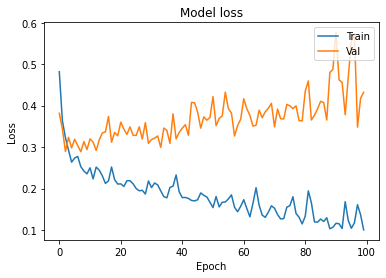

In [65]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

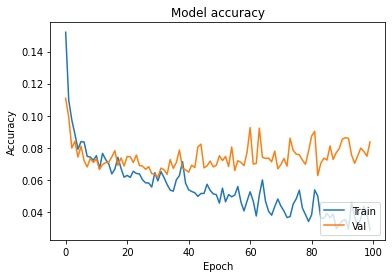

In [73]:
plt.plot(hist_2.history['mse'])
plt.plot(hist_2.history['val_mse'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [67]:
from keras.layers import Dropout
from keras import regularizers

In [68]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [69]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['mse'])

In [70]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 59ms/step - loss: 21.1114 - mse: 0.2470 - val_loss: 3.9046 - val_mse: 0.2127
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 2.4961 - mse: 0.1789 - val_loss: 0.6180 - val_mse: 0.0877
Epoch 3/100
32/32 [==============================] - 2s 52ms/step - loss: 0.5775 - mse: 0.0999 - val_loss: 0.5179 - val_mse: 0.0915
Epoch 4/100
32/32 [==============================] - 2s 56ms/step - loss: 0.5460 - mse: 0.1126 - val_loss: 0.5184 - val_mse: 0.0945
Epoch 5/100
32/32 [==============================] - 2s 61ms/step - loss: 0.4972 - mse: 0.0968 - val_loss: 0.4541 - val_mse: 0.0774
Epoch 6/100
32/32 [==============================] - 2s 59ms/step - loss: 0.4728 - mse: 0.0920 - val_loss: 0.4759 - val_mse: 0.0865
Epoch 7/100
32/32 [==============================] - 2s 59ms/step - loss: 0.4798 - mse: 0.0926 - val_loss: 0.4511 - val_mse: 0.0793
Epoch 8/100
32/32 [==============================] - 2s 49ms/step - loss: 0

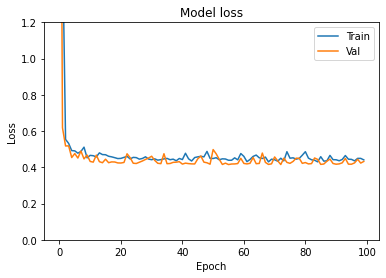

In [71]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

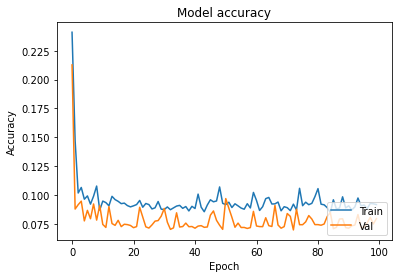

In [74]:
plt.plot(hist_3.history['mse'])
plt.plot(hist_3.history['val_mse'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()